In [1]:
import pandas as pd 
from pandas import ExcelWriter
from pandas import ExcelFile 

df=pd.read_excel("Diabetes Type1 Type2.xlsx")

df

,"Gender (Female=1, Male=2)",Age (years),Height (m),Weight (kg),BMI (kg/m2),Smoking History (pack year),Alcohol Drinking History (drinker/non-drinker),Type of Diabetes,Duration of diabetes (years),Fasting Plasma Glucose (mg/dl),...,Glycated Albumin (%),Total Cholesterol (mmol/L),Triglyceride (mmol/L),High-Density Lipoprotein Cholesterol (mmol/L),Low-Density Lipoprotein Cholesterol (mmol/L),Creatinine (umol/L),Estimated Glomerular Filtration Rate (ml/min/1.73m2),Uric Acid (mmol/L),Blood Urea Nitrogen (mmol/L),Hypoglycemia (yes/no)
0,2,57,1.69,67.4,23.600000,0.0,non-drinker,T2DM,25.000000,82.44,...,14.9,4.07,0.61,2.28,1.86,105,68,245,4.9,yes
1,1,69,1.45,55.8,26.540000,0.0,non-drinker,T2DM,14.000000,137.7,...,15.3,4.36,0.89,1.36,2.89,41,101,337,5.6,yes
2,1,69,1.45,53.2,25.300000,0.0,non-drinker,T2DM,14.000000,138.42,...,17,4.28,0.93,1.13,2.94,39,103,262,3.7,no
3,2,57,1.70,70.0,24.221453,30.0,drinker,T2DM,10.000000,158.4,...,29.8,5.31,1.32,1.33,3.68,71.5,105,475.6,4.74,no
4,1,58,1.64,62.5,23.237656,0.0,non-drinker,T2DM,22.000000,194.4,...,19.5,4.73,1.73,0.91,2.95,36.9,166,490.05,5.54,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1,73,1.61,64.0,24.690405,0.0,non-drinker,T1DM,6.000000,250.2,...,20.1,4.55,1.57,0.77,3.29,54.9,100,285.12,5.37,yes
121,1,59,1.65,62.0,22.773186,0.0,non-drinker,T1DM,20.000000,117,...,24.9,5.46,1.77,0.9,4.25,71,78,351.16,5.13,yes
122,1,65,1.60,35.0,13.671875,0.0,non-drinker,T1DM,2.000000,117,...,71.1,5.15,0.68,1.98,2.71,22.6,286,140.32,2.98,no
123,1,51,1.64,74.0,27.513385,0.0,non-drinker,T1DM,17.000000,342,...,21,4.64,1.03,1.48,2.46,30.4,214,196.92,4.88,yes


In [2]:
# Importing Libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix

# Data Preparation

In [3]:
# Showing columns names
df.columns

Index(['Gender (Female=1, Male=2)', 'Age (years)', 'Height (m)', 'Weight (kg)',
       'BMI (kg/m2)', 'Smoking History (pack year)',
       'Alcohol Drinking History (drinker/non-drinker)', 'Type of Diabetes',
       'Duration of diabetes (years)', 'Fasting Plasma Glucose (mg/dl)',
       '2-hour Postprandial Plasma Glucose (mg/dl)',
       'Fasting C-peptide (nmol/L)', '2-hour Postprandial C-peptide (nmol/L)',
       'Fasting Insulin (pmol/L)', '2-hour Postprandial insulin (pmol/L)',
       'HbA1c (mmol/mol)', 'Glycated Albumin (%)',
       'Total Cholesterol (mmol/L)', 'Triglyceride (mmol/L)',
       'High-Density Lipoprotein Cholesterol (mmol/L)',
       'Low-Density Lipoprotein Cholesterol (mmol/L)', 'Creatinine (umol/L)',
       'Estimated Glomerular Filtration Rate  (ml/min/1.73m2) ',
       'Uric Acid (mmol/L)', 'Blood Urea Nitrogen (mmol/L)',
       'Hypoglycemia (yes/no)'],
      dtype='object')

In [4]:
#Change
df.columns = ['Gender','Age','Height','Weight','BMI','Smoking','Drinking','Type','diabetes','FPG','PPG','FCP','PCP','FI','PI','HbA1c','GA','Chole','Tr','HDLC','LDLC','Cr','EGFR','UA','BUN','Hyp']
df

,Gender,Age,Height,Weight,BMI,Smoking,Drinking,Type,diabetes,FPG,...,GA,Chole,Tr,HDLC,LDLC,Cr,EGFR,UA,BUN,Hyp
0,2,57,1.69,67.4,23.600000,0.0,non-drinker,T2DM,25.000000,82.44,...,14.9,4.07,0.61,2.28,1.86,105,68,245,4.9,yes
1,1,69,1.45,55.8,26.540000,0.0,non-drinker,T2DM,14.000000,137.7,...,15.3,4.36,0.89,1.36,2.89,41,101,337,5.6,yes
2,1,69,1.45,53.2,25.300000,0.0,non-drinker,T2DM,14.000000,138.42,...,17,4.28,0.93,1.13,2.94,39,103,262,3.7,no
3,2,57,1.70,70.0,24.221453,30.0,drinker,T2DM,10.000000,158.4,...,29.8,5.31,1.32,1.33,3.68,71.5,105,475.6,4.74,no
4,1,58,1.64,62.5,23.237656,0.0,non-drinker,T2DM,22.000000,194.4,...,19.5,4.73,1.73,0.91,2.95,36.9,166,490.05,5.54,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1,73,1.61,64.0,24.690405,0.0,non-drinker,T1DM,6.000000,250.2,...,20.1,4.55,1.57,0.77,3.29,54.9,100,285.12,5.37,yes
121,1,59,1.65,62.0,22.773186,0.0,non-drinker,T1DM,20.000000,117,...,24.9,5.46,1.77,0.9,4.25,71,78,351.16,5.13,yes
122,1,65,1.60,35.0,13.671875,0.0,non-drinker,T1DM,2.000000,117,...,71.1,5.15,0.68,1.98,2.71,22.6,286,140.32,2.98,no
123,1,51,1.64,74.0,27.513385,0.0,non-drinker,T1DM,17.000000,342,...,21,4.64,1.03,1.48,2.46,30.4,214,196.92,4.88,yes


In [11]:
#pip install movecolumn
#pip install sdv
#pip install ctgan
#pip install xgboost

In [5]:
# Move Type of Diabetes column to the last position in dataframe!

import movecolumn as mc
mc.MoveToLast(df,'Type')
df

,Gender,Age,Height,Weight,BMI,Smoking,Drinking,diabetes,FPG,PPG,...,Chole,Tr,HDLC,LDLC,Cr,EGFR,UA,BUN,Hyp,Type
0,2,57,1.69,67.4,23.600000,0.0,non-drinker,25.000000,82.44,162.36,...,4.07,0.61,2.28,1.86,105,68,245,4.9,yes,T2DM
1,1,69,1.45,55.8,26.540000,0.0,non-drinker,14.000000,137.7,277.74,...,4.36,0.89,1.36,2.89,41,101,337,5.6,yes,T2DM
2,1,69,1.45,53.2,25.300000,0.0,non-drinker,14.000000,138.42,277.2,...,4.28,0.93,1.13,2.94,39,103,262,3.7,no,T2DM
3,2,57,1.70,70.0,24.221453,30.0,drinker,10.000000,158.4,442.98,...,5.31,1.32,1.33,3.68,71.5,105,475.6,4.74,no,T2DM
4,1,58,1.64,62.5,23.237656,0.0,non-drinker,22.000000,194.4,238.5,...,4.73,1.73,0.91,2.95,36.9,166,490.05,5.54,no,T2DM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1,73,1.61,64.0,24.690405,0.0,non-drinker,6.000000,250.2,372.96,...,4.55,1.57,0.77,3.29,54.9,100,285.12,5.37,yes,T1DM
121,1,59,1.65,62.0,22.773186,0.0,non-drinker,20.000000,117,176.58,...,5.46,1.77,0.9,4.25,71,78,351.16,5.13,yes,T1DM
122,1,65,1.60,35.0,13.671875,0.0,non-drinker,2.000000,117,329.76,...,5.15,0.68,1.98,2.71,22.6,286,140.32,2.98,no,T1DM
123,1,51,1.64,74.0,27.513385,0.0,non-drinker,17.000000,342,283.86,...,4.64,1.03,1.48,2.46,30.4,214,196.92,4.88,yes,T1DM


In [6]:
# Change values name in Type of Diabetes column!
# T1DM = Type 1 diabetes mellitus = 1
# T2DM = Type 2 diabetes mellitus = 2

replace_values = {'T1DM':1, 'T2DM':2}
df = df.replace({"Type": replace_values})

replace_values2 = {'non-drinker':0, 'drinker':1}
df = df.replace({"Drinking": replace_values2})

replace_values3 = {'no':0, 'yes':1}
df = df.replace({"Hyp": replace_values3})

df

,Gender,Age,Height,Weight,BMI,Smoking,Drinking,diabetes,FPG,PPG,...,Chole,Tr,HDLC,LDLC,Cr,EGFR,UA,BUN,Hyp,Type
0,2,57,1.69,67.4,23.600000,0.0,0,25.000000,82.44,162.36,...,4.07,0.61,2.28,1.86,105,68,245,4.9,1,2
1,1,69,1.45,55.8,26.540000,0.0,0,14.000000,137.7,277.74,...,4.36,0.89,1.36,2.89,41,101,337,5.6,1,2
2,1,69,1.45,53.2,25.300000,0.0,0,14.000000,138.42,277.2,...,4.28,0.93,1.13,2.94,39,103,262,3.7,0,2
3,2,57,1.70,70.0,24.221453,30.0,1,10.000000,158.4,442.98,...,5.31,1.32,1.33,3.68,71.5,105,475.6,4.74,0,2
4,1,58,1.64,62.5,23.237656,0.0,0,22.000000,194.4,238.5,...,4.73,1.73,0.91,2.95,36.9,166,490.05,5.54,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1,73,1.61,64.0,24.690405,0.0,0,6.000000,250.2,372.96,...,4.55,1.57,0.77,3.29,54.9,100,285.12,5.37,1,1
121,1,59,1.65,62.0,22.773186,0.0,0,20.000000,117,176.58,...,5.46,1.77,0.9,4.25,71,78,351.16,5.13,1,1
122,1,65,1.60,35.0,13.671875,0.0,0,2.000000,117,329.76,...,5.15,0.68,1.98,2.71,22.6,286,140.32,2.98,0,1
123,1,51,1.64,74.0,27.513385,0.0,0,17.000000,342,283.86,...,4.64,1.03,1.48,2.46,30.4,214,196.92,4.88,1,1


In [7]:
# Rounding big nums to 2 decimals

import numpy as np

df['BMI'] = df['BMI'].apply(lambda r: np.round(r,decimals=2))
df['diabetes'] = df['diabetes'].apply(lambda r: np.round(r,decimals=2))
df

,Gender,Age,Height,Weight,BMI,Smoking,Drinking,diabetes,FPG,PPG,...,Chole,Tr,HDLC,LDLC,Cr,EGFR,UA,BUN,Hyp,Type
0,2,57,1.69,67.4,23.60,0.0,0,25.00,82.44,162.36,...,4.07,0.61,2.28,1.86,105,68,245,4.9,1,2
1,1,69,1.45,55.8,26.54,0.0,0,14.00,137.7,277.74,...,4.36,0.89,1.36,2.89,41,101,337,5.6,1,2
2,1,69,1.45,53.2,25.30,0.0,0,14.00,138.42,277.2,...,4.28,0.93,1.13,2.94,39,103,262,3.7,0,2
3,2,57,1.70,70.0,24.22,30.0,1,10.00,158.4,442.98,...,5.31,1.32,1.33,3.68,71.5,105,475.6,4.74,0,2
4,1,58,1.64,62.5,23.24,0.0,0,22.00,194.4,238.5,...,4.73,1.73,0.91,2.95,36.9,166,490.05,5.54,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1,73,1.61,64.0,24.69,0.0,0,6.00,250.2,372.96,...,4.55,1.57,0.77,3.29,54.9,100,285.12,5.37,1,1
121,1,59,1.65,62.0,22.77,0.0,0,20.00,117,176.58,...,5.46,1.77,0.9,4.25,71,78,351.16,5.13,1,1
122,1,65,1.60,35.0,13.67,0.0,0,2.00,117,329.76,...,5.15,0.68,1.98,2.71,22.6,286,140.32,2.98,0,1
123,1,51,1.64,74.0,27.51,0.0,0,17.00,342,283.86,...,4.64,1.03,1.48,2.46,30.4,214,196.92,4.88,1,1


In [8]:
df = df.replace("/", "")
df

,Gender,Age,Height,Weight,BMI,Smoking,Drinking,diabetes,FPG,PPG,...,Chole,Tr,HDLC,LDLC,Cr,EGFR,UA,BUN,Hyp,Type
0,2,57,1.69,67.4,23.60,0.0,0,25.00,82.44,162.36,...,4.07,0.61,2.28,1.86,105,68,245,4.9,1,2
1,1,69,1.45,55.8,26.54,0.0,0,14.00,137.7,277.74,...,4.36,0.89,1.36,2.89,41,101,337,5.6,1,2
2,1,69,1.45,53.2,25.30,0.0,0,14.00,138.42,277.2,...,4.28,0.93,1.13,2.94,39,103,262,3.7,0,2
3,2,57,1.70,70.0,24.22,30.0,1,10.00,158.4,442.98,...,5.31,1.32,1.33,3.68,71.5,105,475.6,4.74,0,2
4,1,58,1.64,62.5,23.24,0.0,0,22.00,194.4,238.5,...,4.73,1.73,0.91,2.95,36.9,166,490.05,5.54,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1,73,1.61,64.0,24.69,0.0,0,6.00,250.2,372.96,...,4.55,1.57,0.77,3.29,54.9,100,285.12,5.37,1,1
121,1,59,1.65,62.0,22.77,0.0,0,20.00,117,176.58,...,5.46,1.77,0.9,4.25,71,78,351.16,5.13,1,1
122,1,65,1.60,35.0,13.67,0.0,0,2.00,117,329.76,...,5.15,0.68,1.98,2.71,22.6,286,140.32,2.98,0,1
123,1,51,1.64,74.0,27.51,0.0,0,17.00,342,283.86,...,4.64,1.03,1.48,2.46,30.4,214,196.92,4.88,1,1


In [10]:
df = df.replace(r'', np.NaN)

In [11]:
df1= df[df['Type']== 1]

# Filling Nan values with average of columns

In [12]:
df1['PPG'].fillna((df1['PPG'].mean()), inplace=True)
df1['FCP'].fillna((df1['FCP'].mean()), inplace=True)
df1['PCP'].fillna((df1['PCP'].mean()), inplace=True)
df1['FI'].fillna((df1['FI'].mean()), inplace=True)
df1['PI'].fillna((df1['PI'].mean()), inplace=True)
df1['HbA1c'].fillna((df1['HbA1c'].mean()), inplace=True)
df1['GA'].fillna((df1['GA'].mean()), inplace=True)
df1['Cr'].fillna((df1['Cr'].mean()), inplace=True)
df1['EGFR'].fillna((df1['EGFR'].mean()), inplace=True)
df1['UA'].fillna((df1['UA'].mean()), inplace=True)
df1['BUN'].fillna((df1['BUN'].mean()), inplace=True)

In [13]:
df1.reset_index(drop=True)

,Gender,Age,Height,Weight,BMI,Smoking,Drinking,diabetes,FPG,PPG,...,Chole,Tr,HDLC,LDLC,Cr,EGFR,UA,BUN,Hyp,Type
0,1,66,1.50,60.0,26.67,0.0,0,10.00,352.80,348.840000,...,3.59,1.02,0.86,2.01,37.300000,160.0,188.860000,6.470000,0,1
1,2,68,1.70,63.0,21.80,50.0,1,26.00,181.80,258.840000,...,4.78,2.20,0.93,3.28,66.800000,109.0,342.570000,6.050000,1,1
2,2,68,1.70,67.0,23.18,50.0,1,26.00,181.80,258.840000,...,4.78,2.20,0.93,3.28,69.400000,104.0,322.180000,3.060000,1,1
3,2,68,1.70,65.0,22.49,50.0,1,26.00,237.60,268.765714,...,3.49,1.82,0.84,1.83,63.700000,115.0,342.340000,6.210000,1,1
4,2,37,1.90,60.0,16.62,0.0,0,0.08,120.60,248.760000,...,5.61,1.14,1.08,3.95,49.600000,174.0,93.390000,1.850000,1,1
5,1,67,1.55,47.0,19.56,0.0,0,12.00,113.40,305.100000,...,4.57,0.91,1.27,2.76,45.200000,127.0,240.610000,3.980000,1,1
6,2,58,1.70,50.0,17.30,22.5,0,16.00,84.60,370.440000,...,4.05,0.46,1.57,2.12,75.400000,98.0,205.480000,3.960000,1,1
7,2,57,1.61,53.2,20.52,0.0,0,7.00,80.28,193.680000,...,4.44,0.68,1.97,2.57,74.000000,97.0,247.000000,6.400000,1,1
8,2,57,1.61,52.3,20.18,0.0,0,7.00,258.30,245.520000,...,5.12,0.64,1.88,2.93,82.000000,91.0,257.000000,6.400000,1,1
9,2,57,1.60,51.6,20.16,0.0,0,7.00,164.70,72.540000,...,4.27,0.54,1.72,2.63,73.000000,97.0,201.000000,7.300000,1,1


In [15]:
df2= df[df['Type']== 2]
df2.isna().sum()

Gender       0
Age          0
Height       0
Weight       0
BMI          0
Smoking      0
Drinking     0
diabetes     0
FPG          3
PPG         22
FCP         23
PCP         45
FI          33
PI          55
HbA1c        8
GA          23
Chole       22
Tr          18
HDLC        18
LDLC        18
Cr          23
EGFR        24
UA          24
BUN         27
Hyp          0
Type         0
dtype: int64

# Filling Nan values with average of columns

In [16]:
df2['FPG'].fillna((df2['FPG'].mean()), inplace=True)
df2['PPG'].fillna((df2['PPG'].mean()), inplace=True)
df2['FCP'].fillna((df2['FCP'].mean()), inplace=True) 
df2['PCP'].fillna((df2['PCP'].mean()), inplace=True)
df2['FI'].fillna((df2['FI'].mean()), inplace=True)
df2['PI'].fillna((df2['PI'].mean()), inplace=True)
df2['HbA1c'].fillna((df2['HbA1c'].mean()), inplace=True)
df2['GA'].fillna((df2['GA'].mean()), inplace=True)
df2['Chole'].fillna((df2['Chole'].mean()), inplace=True)
df2['Tr'].fillna((df2['Tr'].mean()), inplace=True)
df2['HDLC'].fillna((df2['HDLC'].mean()), inplace=True)
df2['LDLC'].fillna((df2['LDLC'].mean()), inplace=True)
df2['Cr'].fillna((df2['Cr'].mean()), inplace=True)
df2['EGFR'].fillna((df2['EGFR'].mean()), inplace=True)
df2['UA'].fillna((df2['UA'].mean()), inplace=True)
df2['BUN'].fillna((df2['BUN'].mean()), inplace=True)

# Merging both df1 & df2 after some fixes

In [19]:
# unfy
df1 = df1.apply(lambda i: i.apply(lambda x: float(x)))
df2 = df2.apply(lambda i: i.apply(lambda x: float(x)))

In [21]:
frames = [df1, df2]

New_Data = pd.concat(frames)

# Synthetic Data Generation

In [25]:
from ctgan import CTGAN

real_data = New_Data

# Names of the columns that are discrete
discrete_columns = ['Gender','Age','Height','Weight','BMI','Smoking','Drinking','diabetes','FPG','PPG','FCP','PCP','FI',
'PI','HbA1c','GA','Chole','Tr','HDLC','LDLC','Cr','EGFR','UA','BUN','Hyp','Type']

ctgan = CTGAN(epochs=10)
ctgan.fit(real_data, discrete_columns)

# Create synthetic data
synthetic_data = ctgan.sample(20000)

In [26]:
from sklearn.model_selection import train_test_split

X = synthetic_data.drop('Type', axis=1)
y = synthetic_data['Type']

In [27]:
# Normalizing all the features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [28]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=123)

# Finding Out The best Model Using PyCaret

In [29]:
import pandas as pd
from pycaret.classification import * 

In [35]:
#setting the experiment

experiment = setup(synthetic_data, target='Type',silent=True , fold_shuffle=True, session_id=2,use_gpu=True,preprocess=False)

,Description,Value
0,session_id,2
1,Target,Type
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(20000, 26)"
5,Missing Values,False
6,Numeric Features,22
7,Categorical Features,3
8,Transformed Train Set,"(13999, 25)"
9,Transformed Test Set,"(6001, 25)"


In [36]:
#show the best model and their statistics
best_model = compare_models(turbo=True) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6435,0.4825,0.0000,0.0000,0.0000,0.0000,0.0000,3.7060
ridge,Ridge Classifier,0.6435,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3280
lda,Linear Discriminant Analysis,0.6435,0.4802,0.0000,0.0000,0.0000,0.0000,0.0000,0.4290
ada,Ada Boost Classifier,0.6413,0.5026,0.0000,0.0000,0.0000,-0.0022,-0.0058,7.5920
gbc,Gradient Boosting Classifier,0.6394,0.4970,0.0000,0.0000,0.0000,-0.0037,-0.0145,8.2050
et,Extra Trees Classifier,0.6391,0.4956,0.0000,0.0000,0.0000,0.0004,0.0018,8.1870
rf,Random Forest Classifier,0.6388,0.5034,0.0000,0.0000,0.0000,0.0036,0.0100,7.6300
nb,Naive Bayes,0.6378,0.4782,0.0000,0.0000,0.0000,-0.0080,-0.0257,0.2530
catboost,CatBoost Classifier,0.6365,0.4976,0.0000,0.0000,0.0000,-0.0003,0.0000,19.5850
qda,Quadratic Discriminant Analysis,0.6277,0.5004,0.0000,0.0000,0.0000,-0.0021,-0.0032,0.3110


# Data Resampling

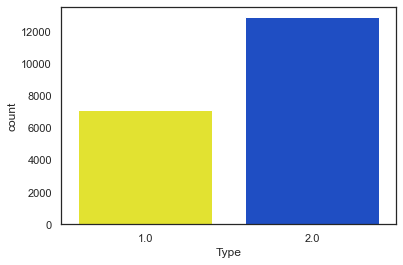

In [37]:
import seaborn as sns
sns.set_theme(style="white")
ax = sns.countplot(x="Type", data=synthetic_data, palette=sns.xkcd_palette(["yellow", "blue"]))

In [38]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(y_train == 2)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2)))

Before OverSampling, counts of label '1': 5696
Before OverSampling, counts of label '2': 10304 

After OverSampling, the shape of train_X: (20608, 25)
After OverSampling, the shape of train_y: (20608,) 

After OverSampling, counts of label '1': 10304
After OverSampling, counts of label '2': 10304


In [101]:
#pip install --user pycaret
#pip install -U scikit-learn

# Features Importance

Feature: 0, Score: -0.00845
Feature: 1, Score: 0.01999
Feature: 2, Score: -0.00993
Feature: 3, Score: 0.00896
Feature: 4, Score: 0.00791
Feature: 5, Score: 0.02845
Feature: 6, Score: 0.01538
Feature: 7, Score: 0.02658
Feature: 8, Score: 0.01664
Feature: 9, Score: 0.03471
Feature: 10, Score: -0.01357
Feature: 11, Score: 0.03900
Feature: 12, Score: 0.00848
Feature: 13, Score: 0.03233
Feature: 14, Score: 0.03422
Feature: 15, Score: 0.01804
Feature: 16, Score: 0.00485
Feature: 17, Score: 0.01511
Feature: 18, Score: 0.04099
Feature: 19, Score: -0.03091
Feature: 20, Score: 0.00768
Feature: 21, Score: 0.02407
Feature: 22, Score: -0.01091
Feature: 23, Score: -0.00005
Feature: 24, Score: 0.03652


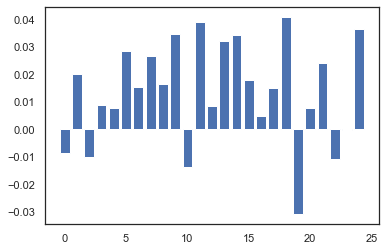

In [39]:
# logistic regression for feature importance
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# define the model
model = LogisticRegression()


# fit the model
model.fit(X_train_res, y_train_res)

# get importance
importance = model.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Confusion Matrix

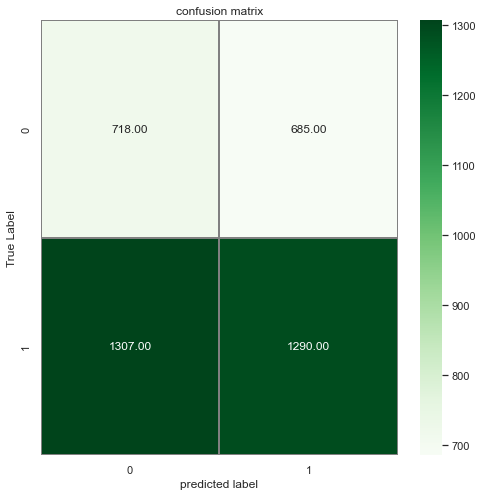

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)

confusion_mtx = confusion_matrix(y_test,Y_pred)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Greens",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

# Classification Report

In [42]:
print(classification_report(y_test ,Y_pred))

              precision    recall  f1-score   support

         1.0       0.35      0.51      0.42      1403
         2.0       0.65      0.50      0.56      2597

    accuracy                           0.50      4000
   macro avg       0.50      0.50      0.49      4000
weighted avg       0.55      0.50      0.51      4000

